In [47]:
# Importing the required libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

##### Downloading contents of the web page

In [48]:
url = "https://en.wikipedia.org/wiki/Lists_of_earthquakes"
data = requests.get(url).text

##### Creating BeautifulSoup object

In [49]:
soup = BeautifulSoup(data, 'html.parser')

In [50]:
# Verifying tables and their classes
print('Classes of each table:')
for table in soup.find_all('table'):
    print(table.get('class'))

Classes of each table:
['box-Multiple_issues', 'plainlinks', 'metadata', 'ambox', 'ambox-content', 'ambox-multiple_issues', 'compact-ambox']
['box-More_citations_needed', 'plainlinks', 'metadata', 'ambox', 'ambox-content', 'ambox-Refimprove']
['box-Original_research', 'plainlinks', 'metadata', 'ambox', 'ambox-content', 'ambox-Original_research']
['sortable', 'wikitable']
['sortable', 'wikitable']
['wikitable', 'sortable']
['wikitable', 'floatleft']
['sortable', 'wikitable']
['wikitable', 'sortable']
['wikitable', 'sortable']
['sortable', 'wikitable']
['nowraplinks', 'mw-collapsible', 'autocollapse', 'navbox-inner']
['nowraplinks', 'navbox-subgroup']
['nowraplinks', 'navbox-subgroup']
['nowraplinks', 'navbox-subgroup']
['nowraplinks', 'hlist', 'mw-collapsible', 'autocollapse', 'navbox-inner']


In [51]:
# Creating list with all tables
table = soup.find_all('table')[3]
print(table)



<table class="sortable wikitable" style="font-size:100%;">
<tbody><tr>
<th>Year
</th>
<th>Magnitude
</th>
<th>Location
</th>
<th>Depth (km)
</th>
<th><a href="/wiki/Modified_Mercalli_intensity_scale" title="Modified Mercalli intensity scale">MMI</a>
</th>
<th>Notes
</th>
<th>Event
</th>
<th>Date
</th></tr>
<tr>
<td>1939
</td>
<td>7.8
</td>
<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="800" data-file-width="1200" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Flag_of_Turkey.svg/23px-Flag_of_Turkey.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Flag_of_Turkey.svg/35px-Flag_of_Turkey.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Flag_of_Turkey.svg/45px-Flag_of_Turkey.svg.png 2x" width="23"/></span></span> </span><a href="/wiki/Turkey" title="Turkey">Turkey</a>, <a href="/wiki/Erzincan_Province" title="Erzincan Province">Er

In [66]:
# Creating rows in tables
rows = table.find_all('tr')
row_list = list()

for tr in rows:
    td = tr.find_all('td')
    row = [i.text for i in td]
    row_list.append(row)

print(row_list[1:])

[['1939\n', '7.8\n', '\xa0Turkey, Erzincan Province\n', '20.0\n', 'XII\n', 'At least 32,700 people were killed.\n', '1939 Erzincan earthquake\n', 'December 27\n'], ['1940\n', '7.7\n', '\xa0Romania, Vrancea County\n', '133.0\n', 'X\n', '1,000 people were killed in Romania and Moldova. Also known as Bucharest earthquake.\n', '1940 Vrancea earthquake\n', 'November 10\n'], ['1941\n', '5.8\n', '\xa0Yemen, Razih District\n', '35.0\n', 'VIII\n', '1,200 people were killed.\n', '1941 Jabal Razih earthquake\n', 'January 11\n'], ['1942\n', '7.0\n', '\xa0Turkey, Erbaa\n', '10.0\n', 'IX\n', '3,000 people were killed.\n', '1942 Niksar–Erbaa earthquake\n', 'December 20\n'], ['1943\n', '7.5–7.7\n', '\xa0Turkey, Çankırı\n', '20.0\n', 'XI\n', 'Between 2,824 and 5,000 people were killed.\n', '1943 Tosya–Ladik earthquake\n', 'November 27\n'], ['1944\n', '7.0\n', '\xa0Argentina, San Juan\n', '15.0\n', 'IX\n', '10,000 people were killed.\n', '1944 San Juan earthquake\n', 'January 15\n'], ['1945\n', '8.1\n',

In [67]:
# Defining of the dataframe
# Replace Headers as needed.
# Format data into a more readable format
# Location column in website is formatted to Country and location as seperate columns


df = pd.DataFrame(columns=['Year', 'Magnitude','Country','Location', 'Depth', 'MMI', 'Notes','Event','Date'])

# Collecting Ddata
for row in table.tbody.find_all('tr'):    
    # Find all data for each column
    columns = row.find_all('td')
    
        
    if(columns != []):
        print(columns)
        year = columns[0].text.strip()
        magnitude = columns[1].text.strip()
        #location = columns[2].span.contents 
        locations = columns[2].findAll('a')
        print(type(locations))
        print(locations)
        location_list = []
        for key in locations:
            
            location = key.text
            print(location)
            location_list.append(location)
        print(location_list)
        country = location_list[0]        
        location = location_list[1]
        depth=columns[3].text.strip()
        mmi = columns[4].text.strip()
        notes = columns[5].text.strip()
        event = columns[6].text.strip()        
        date = columns[7].text.strip()
        print(location)
        df = df.append({'Year': year, 'Magnitude': magnitude, 'Country': country,'Location': location, 'Depth': depth, 'MMI': mmi, 'Notes': notes, 'Event': event, 'Date': date},ignore_index=True)

[<td>1939
</td>, <td>7.8
</td>, <td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="800" data-file-width="1200" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Flag_of_Turkey.svg/23px-Flag_of_Turkey.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Flag_of_Turkey.svg/35px-Flag_of_Turkey.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Flag_of_Turkey.svg/45px-Flag_of_Turkey.svg.png 2x" width="23"/></span></span> </span><a href="/wiki/Turkey" title="Turkey">Turkey</a>, <a href="/wiki/Erzincan_Province" title="Erzincan Province">Erzincan Province</a>
</td>, <td>20.0
</td>, <td>XII
</td>, <td>At least 32,700 people were killed.
</td>, <td><b><a href="/wiki/1939_Erzincan_earthquake" title="1939 Erzincan earthquake">1939 Erzincan earthquake</a></b>
</td>, <td>December 27
</td>]
<class 'bs4.element.ResultSet'>
[<a href="/wiki/Turkey" title

C:\Users\shema\AppData\Local\Temp\ipykernel_21308\2182559996.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Magnitude': magnitude, 'Country': country,'Location': location, 'Depth': depth, 'MMI': mmi, 'Notes': notes, 'Event': event, 'Date': date},ignore_index=True)
C:\Users\shema\AppData\Local\Temp\ipykernel_21308\2182559996.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Magnitude': magnitude, 'Country': country,'Location': location, 'Depth': depth, 'MMI': mmi, 'Notes': notes, 'Event': event, 'Date': date},ignore_index=True)
C:\Users\shema\AppData\Local\Temp\ipykernel_21308\2182559996.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(

IndexError: list index out of range

###### Transformation done on Magnitude Column having range values to average for e.g 7.5–7.7 to 7.6 

In [68]:
def cal_average(num):
    sum_num = 0.0    
    print(num)
    for t in num:       
       sum_num = sum_num + float(t)     
    avg = sum_num / len(num)
    print(avg)
    return avg

In [69]:
#Transforming average
row=0;
for ind in df['Magnitude']:
    mag = []     
    row=row+1
    print(row)
    if '–' or '&' in [ind]:           
        mag=ind.split("–")        
        avg = cal_average(mag)
        df.loc[row-1, ['Magnitude']] = avg
        


1
['7.8']
7.8
2
['7.7']
7.7
3
['5.8']
5.8
4
['7.0']
7.0
5
['7.5', '7.7']
7.6
6
['7.0']
7.0
7
['8.1']
8.1
8
['7.8']
7.8
9
['7.3']
7.3
10
['7.5']
7.5
11
['8.6']
8.6


In [70]:
df

,Year,Magnitude,Country,Location,Depth,MMI,Notes,Event,Date
0,1939,7.8,Turkey,Erzincan Province,20.0,XII,"At least 32,700 people were killed.",1939 Erzincan earthquake,December 27
1,1940,7.7,Romania,Vrancea County,133.0,X,"1,000 people were killed in Romania and Moldov...",1940 Vrancea earthquake,November 10
2,1941,5.8,Yemen,Razih District,35.0,VIII,"1,200 people were killed.",1941 Jabal Razih earthquake,January 11
3,1942,7.0,Turkey,Erbaa,10.0,IX,"3,000 people were killed.",1942 Niksar–Erbaa earthquake,December 20
4,1943,7.6,Turkey,Çankırı,20.0,XI,"Between 2,824 and 5,000 people were killed.",1943 Tosya–Ladik earthquake,November 27
5,1944,7.0,Argentina,San Juan,15.0,IX,"10,000 people were killed.",1944 San Juan earthquake,January 15
6,1945,8.1,British India,Makran Coast,15.0,X,"Between 300 and 4,000 people were killed.",1945 Balochistan earthquake,November 28
7,1946,7.8,Dominican Republic,Samana,15.0,IX,"2,550 people were killed.",1946 Dominican Republic earthquake,August 4
8,1948,7.3,Soviet Union,Turkmen Soviet Socialist Republic,15.0,X,"Between 10,000 and 110,000 people were killed ...",1948 Ashgabat earthquake,October 6
9,1949,7.5,Soviet Union,Tajik Soviet Socialist Republic,18.0,IX,"12,000 people were killed, mostly due to lands...",1949 Khait earthquake,July 10


In [71]:
import re
def extract_numbers(inp_str):
    num = re.findall(r'\d+', inp_str) 
    print(num) 
    return num

In [72]:
#Transforming Number of people died in each event.
row=0;
for ind in df['Notes']:
    
    print(ind)
    mag = []     
    row=row+1
    print(row)
    deaths =extract_numbers(ind)
    deaths=','.join(deaths)
    print(deaths)
    if 'Between ' not in ind:
        df.loc[row-1, ['Deaths']] = deaths
    else:
        df.loc[row-1, ['Deaths']] = ind    

At least 32,700 people were killed.
1
['32', '700']
32,700
1,000 people were killed in Romania and Moldova. Also known as Bucharest earthquake.
2
['1', '000']
1,000
1,200 people were killed.
3
['1', '200']
1,200
3,000 people were killed.
4
['3', '000']
3,000
Between 2,824 and 5,000 people were killed.
5
['2', '824', '5', '000']
2,824,5,000
10,000 people were killed.
6
['10', '000']
10,000
Between 300 and 4,000 people were killed.
7
['300', '4', '000']
300,4,000
2,550 people were killed.
8
['2', '550']
2,550
Between 10,000 and 110,000 people were killed and the city of Ashgabat was completely destroyed.
9
['10', '000', '110', '000']
10,000,110,000
12,000 people were killed, mostly due to landslides that buried the city of Khait.
10
['12', '000']
12,000
It is the largest earthquake on land and the largest one to occur due to continental collision rather than plate subduction. 4,800 people were killed.
11
['4', '800']
4,800


In [73]:
df

,Year,Magnitude,Country,Location,Depth,MMI,Notes,Event,Date,Deaths
0,1939,7.8,Turkey,Erzincan Province,20.0,XII,"At least 32,700 people were killed.",1939 Erzincan earthquake,December 27,"32,700"
1,1940,7.7,Romania,Vrancea County,133.0,X,"1,000 people were killed in Romania and Moldov...",1940 Vrancea earthquake,November 10,"1,000"
2,1941,5.8,Yemen,Razih District,35.0,VIII,"1,200 people were killed.",1941 Jabal Razih earthquake,January 11,"1,200"
3,1942,7.0,Turkey,Erbaa,10.0,IX,"3,000 people were killed.",1942 Niksar–Erbaa earthquake,December 20,"3,000"
4,1943,7.6,Turkey,Çankırı,20.0,XI,"Between 2,824 and 5,000 people were killed.",1943 Tosya–Ladik earthquake,November 27,"Between 2,824 and 5,000 people were killed."
5,1944,7.0,Argentina,San Juan,15.0,IX,"10,000 people were killed.",1944 San Juan earthquake,January 15,"10,000"
6,1945,8.1,British India,Makran Coast,15.0,X,"Between 300 and 4,000 people were killed.",1945 Balochistan earthquake,November 28,"Between 300 and 4,000 people were killed."
7,1946,7.8,Dominican Republic,Samana,15.0,IX,"2,550 people were killed.",1946 Dominican Republic earthquake,August 4,"2,550"
8,1948,7.3,Soviet Union,Turkmen Soviet Socialist Republic,15.0,X,"Between 10,000 and 110,000 people were killed ...",1948 Ashgabat earthquake,October 6,"Between 10,000 and 110,000 people were killed ..."
9,1949,7.5,Soviet Union,Tajik Soviet Socialist Republic,18.0,IX,"12,000 people were killed, mostly due to lands...",1949 Khait earthquake,July 10,"12,000"


<Figure size 1000x600 with 0 Axes>

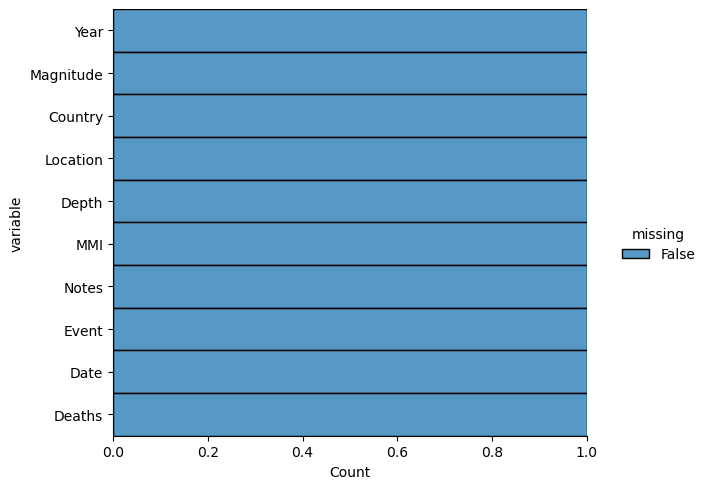

In [74]:
#Visualizing Dataset Without Cleaning
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

#No traces of missing data

In [75]:
df.isnull().sum() # No null values in webscraped dataset.

Year         0
Magnitude    0
Country      0
Location     0
Depth        0
MMI          0
Notes        0
Event        0
Date         0
Deaths       0
dtype: int64

In [76]:
#To check for Duplicates 
df2 = df[df.duplicated()]
print(df2)


#To remove Duplicates
df = df.drop_duplicates()

Empty DataFrame
Columns: [Year, Magnitude, Country, Location, Depth, MMI, Notes, Event, Date, Deaths]
Index: []


In [77]:
df.shape
df.dtypes

Year         object
Magnitude    object
Country      object
Location     object
Depth        object
MMI          object
Notes        object
Event        object
Date         object
Deaths       object
dtype: object

In [78]:
##Plotting Histogram

df['Depth (km)']=df['Depth (km)'].astype(float)
fig = df.hist(column='Depth (km)')

##

KeyError: 'Depth (km)'

In [79]:
df
df.to_csv('cleaneddata_from_website.csv')

In [80]:
Steps involved :
# Importing the required libraries
# Parsing the website with BeautifulSoup
## Verifying tables and their classes
# Creating list with all tables
# Defining of the dataframe
# Replace Headers as needed.
# Format data into a more readable format
# Location column in website is formatted to Country and location as seperate columns
# Transformation done on Magnitude Column having range values to average for e.g 7.5–7.7 to 7.6
# Transforming Number of people died in each eventin new column called Deaths
# Visualizing Dataset Without Cleaning - No Missing data
#To check for Duplicates 
##Plotting Histogram to check outliers.

SyntaxError: invalid syntax (1227718.py, line 1)

In [81]:
In this scenario, the ethical implications are greatly important mainly due to the high number of people affected. 
For example, if data wrangling does not occur, this can lead to the raw data not being used in the imtemded way, 
thus leading to innacurate building reinforcements and earthquake simulations. These inconsistencies can result in 
misconstrued errors and a high number of fatalities if executed improperly due to using raw data.
Overall, data wrangling is necessary so that professionals can use the data they garner in a way that they can effectively 
use and positively impact others, instead of harming them. 
    . A strong earthquake immediately changes surprised feelings into shock and desperation. 
    A positive approach should comprise the following: 
        (1) a better knowledge of seismicity, 
        (2) constant awareness of seismic activity, 
        (3) an understanding of the meaning of the probability applied to seismicity and 
        (4) a movement towards positive activities such as building reinforcements and earthquake simulation activities.
Social and ethical implications need to find an equilibrium point between alarmism and the undervaluation of the hazard.

SyntaxError: invalid syntax (4041510370.py, line 1)